Your Full Name

 - collaborator 1
 - collaborator 2

# Problem Set 0

Congrats! You've successfully cloned the our first warm-up problem set.

This problem set will be collected (so you get practice committing and pushing your GitHub repository), but it will not be graded as an assignment.

The purpose of this assignment is to familiarize ourselves with the Visual Studio Code IDE and to refresh some coding skills that you may not have exercised in a while. Let's go!

## The coding part

First, let's import some of our favorite packages: numpy, pandas, and matplotlib.pyplot

In [1]:

import numpy as np
import matplotlib.pyplot as plt


## Let's start coding

We'll reserve this next cell for some functions we'll write.

In [2]:

def line(m=0, b=0):
    return lambda x: m*x + b

def residuals(model, x, y):
    return y - model(x)

def plot_model(model, x, ax = None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(10,10))
    else:
        fig = ax.get_figure()
    
    h = ax.plot(x, model(x), 
            color = 'teal', linestyle = ':',
            label = 'Model')
    return h

def residuals_for_plot(model, x, y):
    return np.vstack([x,x]), np.vstack([y, model(x)])

def plot_residuals(model, x, y, ax = None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize(10,10))
    # else:
    #     fig = ax.get_figure()
    
    X, Y = residuals_for_plot(model, x, y)
    
    h = ax.plot(X, Y, color = 'salmon', label = 'Residuals')
    return h

def rmse(model, x, y):
    return np.sqrt(np.mean(residuals(model, x, y)**2))


First, let's fabricate some data.

 - For our x-values, let's generate some 20 random samples in the range (-5,5)
 - For our y-values, we'll have them be a linear (affine actually) function of x, with some noise. Use slope of 0.8 and y-intercept of 2.3 and add normally distributed noise.
We'll generate some random samples 

In [3]:
np.random.seed(2025) 

'''
Random isn't really random, it's pseudo-random. 
This sets the seed for the random number generator so that we can get the same results every time we run the code.
'''

num_data = 20 # how many data points we want

x = np.sort(10*np.random.rand(num_data))-5
y = 0.8*x + 2.3 + np.random.randn(num_data)

## Plotting and writing functions

First, let's plot the data.

We'll also want to plot:
 - A line with slope and intercept of our choosing.
 - residuals (distances from a line to the data)
 - Calculate the RMSE error

 $ RMSE = \sqrt{\frac{1}{n}\sum^{n}_{j=1} (y_j - f(x_j))^2}$

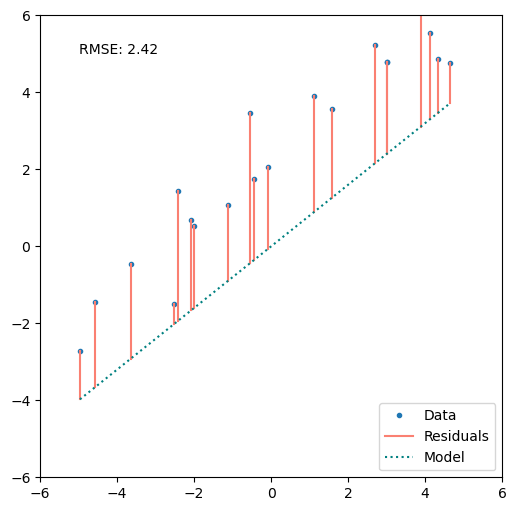

In [4]:

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.plot(x, y, '.', label = 'Data')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

ax.set_aspect('equal')


a = 0.8
model = line(m=a)

line_res = plot_residuals(model, x, y, ax = ax)
line_mod = plot_model(model, x, ax = ax)

ax.text(-5, 5, f'RMSE: {rmse(model, x, y):.2f}')

handles, labels = ax.get_legend_handles_labels()
legend_dict = dict(zip(labels, handles))  
ax.legend(legend_dict.values(), legend_dict.keys(), loc = 'lower right')


plt.show()

## Trying different models

We'll write a loop to calculate the RMSE for lines (models) of different slopes.

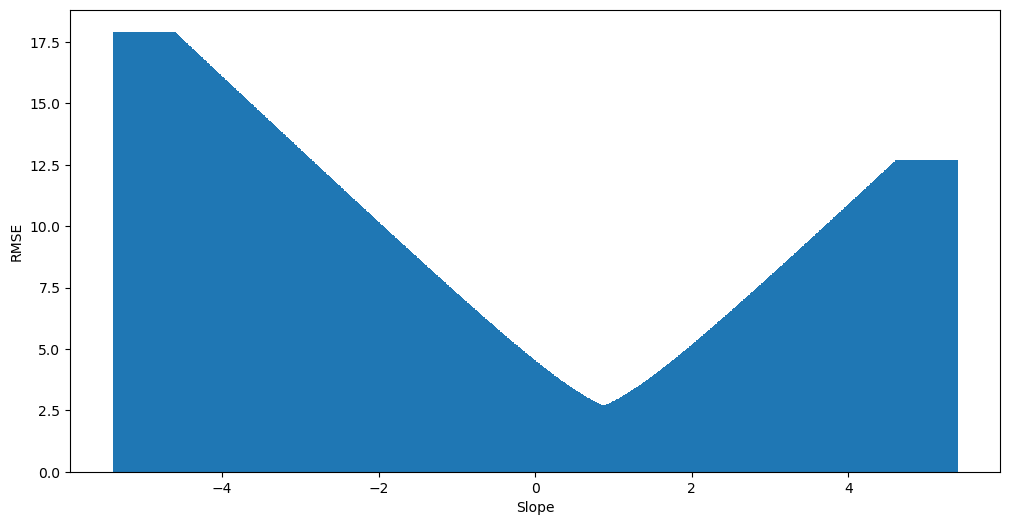

In [5]:
A = np.linspace(-5, 5, 1000)
C = np.zeros_like(A)

for k, a in enumerate(A):
    model = line(m=a)
    C[k] = rmse(model, x, y)
 
fig, ax = plt.subplots(1,1, figsize = (12,6))   
ax.bar(A, C)
ax.set_xlabel('Slope')
ax.set_ylabel('RMSE')
plt.show()

### Can our model be improved?

Why is our best fit model not that good?